In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from pathlib import Path

path_dataset=Path(r'd:\datasets\small_datasets\katta')
list(path_dataset.iterdir())

[WindowsPath('d:/datasets/small_datasets/katta/data_casestudy.xlsx'),
 WindowsPath('d:/datasets/small_datasets/katta/df_1.csv'),
 WindowsPath('d:/datasets/small_datasets/katta/Odometer & Registration Year Data.xlsx')]

In [8]:
df1=pd.read_csv(list(path_dataset.iterdir())[1], index_col=0)
df1.head()

,lead_id,make,model,variant,HVB,totalRFC_summary,acCoolingIsNormal_airConditioning,acFanAndCompressorNoiseIsNormal_airConditioning,autoClimateControl_airConditioning,heaterOperationIsNormalAndEffective_airConditioning,...,number_of_dealers,rating_accessoriesFeatures,rating_airConditioning,rating_electricalsInterior,rating_engineTransmission,rating_exteriorTyres,rating_steeringSuspensionBrakes,number_of_dealers.1,year,odometer
0,1000000199,HONDA,CIVIC,1.8V AT,160000,39500,Yes,No,Yes,Yes,...,4,5,3,3,4,3,3,4,2008.0,56749.0
1,1000000494,MARUTI SUZUKI,RITZ,LXI BS IV,130000,27500,Yes,Yes,NaN,Yes,...,4,5,5,4,5,2,4,4,2010.0,84215.0
2,1000000593,HYUNDAI,EON,MAGNA PLUS,199000,28000,Yes,Yes,NaN,Yes,...,6,5,5,4,4,3,4,6,2015.0,34794.0
3,1000000794,FORD,FIGO,ZXI DURATEC 1.2,104000,27200,No,Yes,NaN,Yes,...,3,5,3,3,3,3,3,3,2010.0,72326.0
4,1000002298,HYUNDAI,VERNA,FLUIDIC 1.6 EX CRDI,412000,47500,Yes,Yes,Yes,Yes,...,12,5,5,4,3,3,4,12,2012.0,76961.0


In [44]:
df1.isna().mean()

lead_id                                                     0.000000
make                                                        0.000000
model                                                       0.000000
variant                                                     0.000000
HVB                                                         0.000000
totalRFC_summary                                            0.000000
acCoolingIsNormal_airConditioning                           0.006123
acFanAndCompressorNoiseIsNormal_airConditioning             0.006095
autoClimateControl_airConditioning                          0.760638
heaterOperationIsNormalAndEffective_airConditioning         0.009624
interstateNocIssued_documentDetails                         0.000000
isUnderHypothecation_documentDetails                        0.000000
roadTaxPaidInterstate_documentDetails                       0.000000
toBeScrapped_documentDetails                                0.000000
allDisplayLightsIsWorkingProperly_

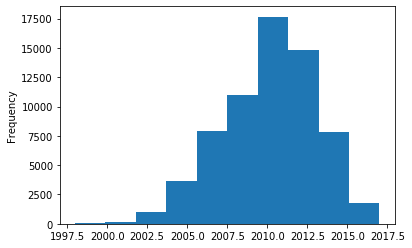

In [11]:
df1.year.plot(kind='hist')

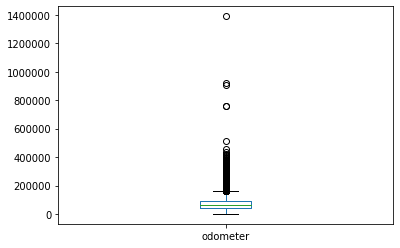

In [16]:
df1.odometer.plot(kind='box')

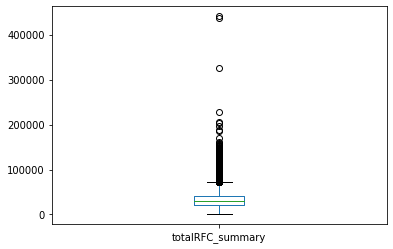

In [57]:
df1.totalRFC_summary.plot(kind='box')

In [17]:
df1.odometer.max()

1389567.0

In [21]:
df1[df1.odometer==1389567]

,lead_id,make,model,variant,HVB,totalRFC_summary,acCoolingIsNormal_airConditioning,acFanAndCompressorNoiseIsNormal_airConditioning,autoClimateControl_airConditioning,heaterOperationIsNormalAndEffective_airConditioning,...,number_of_dealers,rating_accessoriesFeatures,rating_airConditioning,rating_electricalsInterior,rating_engineTransmission,rating_exteriorTyres,rating_steeringSuspensionBrakes,number_of_dealers.1,year,odometer
45900,1037434496,MARUTI SUZUKI,SWIFT,VDI,185000,93500,Yes,No,NaN,Yes,...,7,5,4,3,3,4,3,7,2008.0,1389567.0


In [29]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

In [41]:
cols=list(df1.columns)
dep_col='totalRFC_summary'
cols.remove(dep_col)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df1[cols], # just the features
                                                    df1[dep_col], # the target
                                                    test_size=0.3, # the percentage of obs in the test set
                                                    random_state=0) # for reproducibility
X_train.shape, X_test.shape

((49385, 48), (21165, 48))

In [43]:
df1.shape

(70550, 49)

In [52]:
num_cols=X_train.dtypes!=object; num_cols

lead_id                                                      True
make                                                        False
model                                                       False
variant                                                     False
HVB                                                          True
acCoolingIsNormal_airConditioning                           False
acFanAndCompressorNoiseIsNormal_airConditioning             False
autoClimateControl_airConditioning                          False
heaterOperationIsNormalAndEffective_airConditioning         False
interstateNocIssued_documentDetails                         False
isUnderHypothecation_documentDetails                        False
roadTaxPaidInterstate_documentDetails                       False
toBeScrapped_documentDetails                                False
allDisplayLightsIsWorkingProperly_electricalsInterior       False
doorFunctionsProperly_electricalsInterior                   False
musicSyste

In [53]:
mean_imputer= SimpleImputer(strategy='mean')
mean_imputer.fit(X_train[num_cols])

D:\narain\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).